# Data description from Kaggle webiste
Flight Price Prediction Dataset" is a comprehensive collection of data aimed at predicting the prices of airline tickets. This dataset provides a rich source of information for machine learning and data analysis enthusiasts interested in the aviation and travel industry. It includes a wide range of features and variables, such as flight routes, departure and arrival cities, airline carriers, departure and arrival times, ticket class, and more. With this dataset, researchers and data scientists can explore and develop predictive models to estimate airfare prices, helping travelers make informed decisions and airlines optimize their pricing strategies. It's a valuable resource for anyone looking to delve into the world of airfare prediction and travel analytics

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## reading train data

In [198]:
df = pd.read_excel('flight_dataset/Data_Train.xlsx', parse_dates=['Date_of_Journey'])
df

C:\Users\Amin\AppData\Local\Temp\ipykernel_19332\1791197192.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_excel('flight_dataset/Data_Train.xlsx', parse_dates=['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [200]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Preprocessing data

In [201]:
df.dropna(inplace=True)

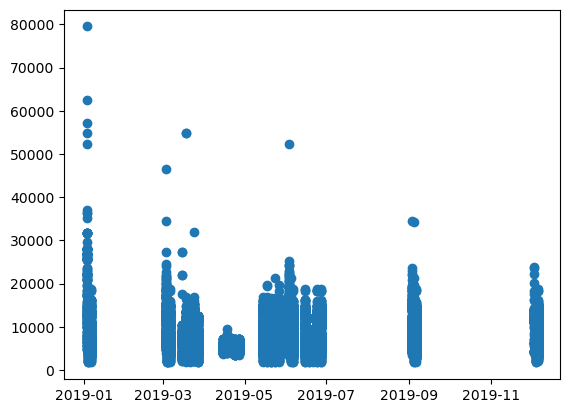

In [202]:
fig , ax = plt.subplots()
ax.scatter(df['Date_of_Journey'],df['Price'])

It seems its all in 2019 so we can just remove the year from date time

In [203]:
df['month'] = df['Date_of_Journey'].dt.month
df['day'] = df['Date_of_Journey'].dt.day

## convert data types

In [204]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.strftime('%H:%m')
df['Dep_Time']

0        22:11
1        05:11
2        09:11
3        18:11
4        16:11
         ...  
10678    19:11
10679    20:11
10680    08:11
10681    11:11
10682    10:11
Name: Dep_Time, Length: 10682, dtype: object

In [205]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [206]:
# spliting the departure hour to hour and minute

df[['dep_hour','dep_min']] = df['Dep_Time'].str.replace('[:]',' ').str.split(' ', expand = True).astype(int)

C:\Users\Amin\AppData\Local\Temp\ipykernel_19332\3644371292.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[['dep_hour','dep_min']] = df['Dep_Time'].str.replace('[:]',' ').str.split(' ', expand = True).astype(int)


In [207]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,dep_hour,dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:11,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,11
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:11,13:15,7h 25m,2 stops,No info,7662,1,5,5,11
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:11,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,11
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:11,23:30,5h 25m,1 stop,No info,6218,12,5,18,11
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:11,21:35,4h 45m,1 stop,No info,13302,1,3,16,11


### convert duration to minutes

In [208]:
df['total_stops'] = df['Total_Stops'].str.extract('(\d+) stops')
df['total_stops'].fillna(0, inplace= True)

In [209]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,dep_hour,dep_min,total_stops
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:11,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,11,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:11,13:15,7h 25m,2 stops,No info,7662,1,5,5,11,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:11,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,11,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:11,23:30,5h 25m,1 stop,No info,6218,12,5,18,11,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:11,21:35,4h 45m,1 stop,No info,13302,1,3,16,11,0


In [210]:
df['minutes'] = df['Duration'].str.extract('(\d+)m').astype(float)
df['minutes'].fillna(0,inplace= True)

In [211]:
df['hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
df['hours'].fillna(0, inplace=True)

In [212]:
df['total_minutes'] = df['hours'] * 60 + df['minutes']
df['total_minutes']

0         170.0
1         445.0
2        1140.0
3         325.0
4         285.0
          ...  
10678     150.0
10679     155.0
10680     180.0
10681     160.0
10682     500.0
Name: total_minutes, Length: 10682, dtype: float64

In [213]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,dep_hour,dep_min,total_stops,minutes,hours,total_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:11,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,11,0,50.0,2.0,170.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:11,13:15,7h 25m,2 stops,No info,7662,1,5,5,11,2,25.0,7.0,445.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:11,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,11,2,0.0,19.0,1140.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:11,23:30,5h 25m,1 stop,No info,6218,12,5,18,11,0,25.0,5.0,325.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:11,21:35,4h 45m,1 stop,No info,13302,1,3,16,11,0,45.0,4.0,285.0


### change the Route format for machine learning

In [214]:
df[['Route_1','Route_2','Route_3','Route_4','Route_5','Route_6']] = df['Route'].str.split('→',expand = True)

In [186]:
df.head(1).T

,0
Airline,IndiGo
Date_of_Journey,2019-03-24 00:00:00
Source,Banglore
Destination,New Delhi
Route,BLR → DEL
Dep_Time,22:11
Arrival_Time,01:10 22 Mar
Duration,2h 50m
Total_Stops,non-stop
Additional_Info,No info


drop the unuesed columns

In [215]:
df.drop(['hours','minutes','Duration','Total_Stops','Arrival_Time','Dep_Time','Route','Date_of_Journey'], axis=1, inplace = True)

In [216]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,month,day,dep_hour,dep_min,total_stops,total_minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,No info,3897,3,24,22,11,0,170.0,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,No info,7662,1,5,5,11,2,445.0,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,9,11,2,1140.0,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,18,11,0,325.0,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,16,11,0,285.0,BLR,NAG,DEL,None,None,None


# Let's see price to total minutes flight plot

Text(0, 0.5, 'Price')

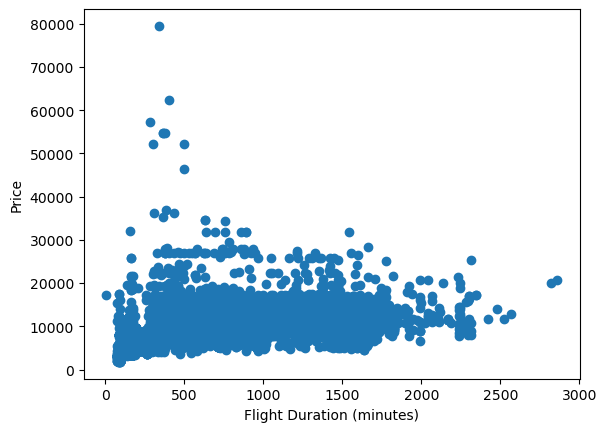

In [189]:
fig , ax = plt.subplots()
ax.scatter(df['total_minutes'],df['Price'])
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Price')

## Price to flight stops plot

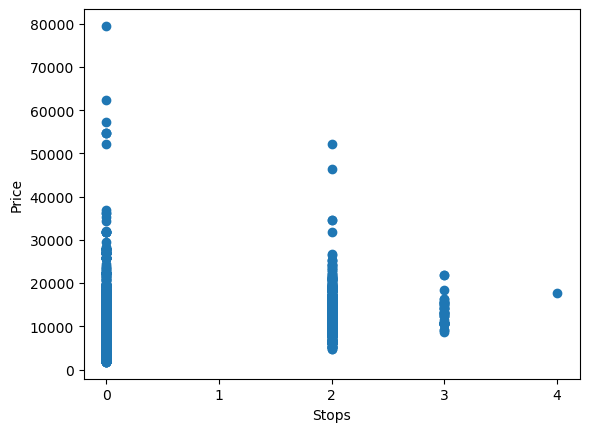

In [190]:
fig , ax = plt.subplots()
ax.scatter(df['total_stops'],df['Price'])
plt.xlabel('Stops')
plt.ylabel('Price')
plt.xticks([0,1,2,3,4]);

### let's plot the Price distrubation

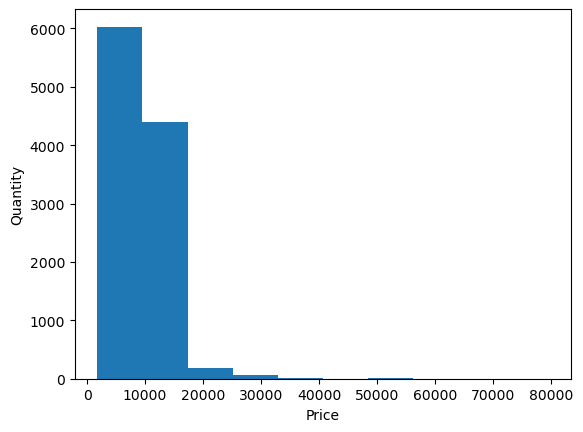

In [191]:
fig , ax = plt.subplots()
ax.hist(df['Price'],bins = 10)
ax.set(xlabel= 'Price',
      ylabel='Quantity');

## Convert strings to categories

In [217]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Airline
Source
Destination
Additional_Info
total_stops
Route_1
Route_2
Route_3
Route_4
Route_5
Route_6


In [218]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [219]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,month,day,dep_hour,dep_min,total_stops,total_minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,No info,3897,3,24,22,11,0,170.0,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,No info,7662,1,5,5,11,2,445.0,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,9,11,2,1140.0,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,18,11,0,325.0,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,16,11,0,285.0,BLR,NAG,DEL,NaN,NaN,NaN


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          10682 non-null  category
 1   Source           10682 non-null  category
 2   Destination      10682 non-null  category
 3   Additional_Info  10682 non-null  category
 4   Price            10682 non-null  int64   
 5   month            10682 non-null  int64   
 6   day              10682 non-null  int64   
 7   dep_hour         10682 non-null  int32   
 8   dep_min          10682 non-null  int32   
 9   total_stops      10682 non-null  category
 10  total_minutes    10682 non-null  float64 
 11  Route_1          10682 non-null  category
 12  Route_2          10682 non-null  category
 13  Route_3          7191 non-null   category
 14  Route_4          1566 non-null   category
 15  Route_5          46 non-null     category
 16  Route_6          1 non-null      categor

In [221]:
df.isna().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price                  0
month                  0
day                    0
dep_hour               0
dep_min                0
total_stops            0
total_minutes          0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
Route_6            10681
dtype: int64

In [222]:
# turn categorical variable into numbers and fill missing values
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
#         add 1 so we know zeroes are null because before that they where -1
        df[label] = pd.Categorical(content).codes + 1

In [223]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,month,day,dep_hour,dep_min,total_stops,total_minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,4,1,6,9,3897,3,24,22,11,1,170.0,1,14,0,0,0,0
1,2,4,1,9,7662,1,5,5,11,2,445.0,3,26,2,4,0,0
2,5,3,2,9,13882,9,6,9,11,2,1140.0,4,33,5,6,0,0
3,4,4,1,9,6218,12,5,18,11,1,325.0,3,35,4,0,0,0
4,4,1,6,9,13302,1,3,16,11,1,285.0,1,35,9,0,0,0


# Modelling

In [225]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(n_jobs = -1,
                             random_state=42)

X = df.drop('Price',axis=1)
y = df['Price']


# split the data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 42)

CPU times: total: 0 ns
Wall time: 7.06 ms


In [227]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# model evaluation

In [228]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    calculates root mean squared log error 
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create a function to evaluate model on different models

def show_scores(model,X_train, X_valid, y_train, y_valid):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, val_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, val_preds),
             'Training R^2': r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    
    return scores

In [229]:
show_scores(model, X_train, X_val, y_train, y_val)

{'Training MAE': 271.6858096422302,
 'Valid MAE': 670.0854002031479,
 'Training RMSLE': 0.057590677922860656,
 'Valid RMSLE': 0.1314613345963877,
 'Training R^2': 0.9787709273476227,
 'Valid R^2': 0.8658275536000134}

# Hyper parameter tuning with randomized search cv


In [231]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators': np.arange(10,100,10),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2),
          'max_features': [0.5,1, 'sqrt','auto']}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions= rf_grid,
                             n_iter=60,
                             cv = 3,
                             verbose=True)

# fit the randomized search cv
rs_model.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


D:\APPS\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\APPS\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\APPS\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTrees

D:\APPS\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\APPS\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\APPS\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTrees

CPU times: total: 24.2 s
Wall time: 35.2 s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=60,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [234]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': None}

In [235]:
show_scores(rs_model, X_train, X_val, y_train, y_val)

{'Training MAE': 493.91107179993503,
 'Valid MAE': 701.7955012424645,
 'Training RMSLE': 0.09291621717015985,
 'Valid RMSLE': 0.13258953556001557,
 'Training R^2': 0.9358068624671897,
 'Valid R^2': 0.8682681090548606}